<a href="https://colab.research.google.com/github/IdealisticINTJ/My_Machine_Learning_Projects/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy
import matplotlib
import pandas
import sklearn
import warnings


print('Python : {}'.format(sys.version))
print('Numpy : {}'.format(numpy.__version__))
print('Pandas : {}'.format(pandas.__version__))
print('Matplotlib : {}'.format(matplotlib.__version__))
print('sklearn : {}'.format(sklearn.__version__))

Python : 3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
Numpy : 1.19.5
Pandas : 1.1.5
Matplotlib : 3.2.2
sklearn : 0.22.2.post1


In [ ]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import model_selection  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,accuracy_score

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name = ['id','clump_thickness','cell_size_uniformity','cell_shape_uniformity','Marginal_Adhesion','Epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df = pd.read_csv(url,names = name)

In [ ]:
df.replace('?',-99999,inplace = True)
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'Marginal_Adhesion', 'Epithelial_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses',
       'class'],
      dtype='object')]


In [ ]:
df.drop(['id'],1,inplace = True)

print(df.shape)

(699, 10)


In [ ]:
print(df.describe())

       clump_thickness  cell_size_uniformity  ...     mitoses       class
count       699.000000            699.000000  ...  699.000000  699.000000
mean          4.417740              3.134478  ...    1.589413    2.689557
std           2.815741              3.051459  ...    1.715078    0.951273
min           1.000000              1.000000  ...    1.000000    2.000000
25%           2.000000              1.000000  ...    1.000000    2.000000
50%           4.000000              1.000000  ...    1.000000    2.000000
75%           6.000000              5.000000  ...    1.000000    4.000000
max          10.000000             10.000000  ...   10.000000    4.000000

[8 rows x 9 columns]


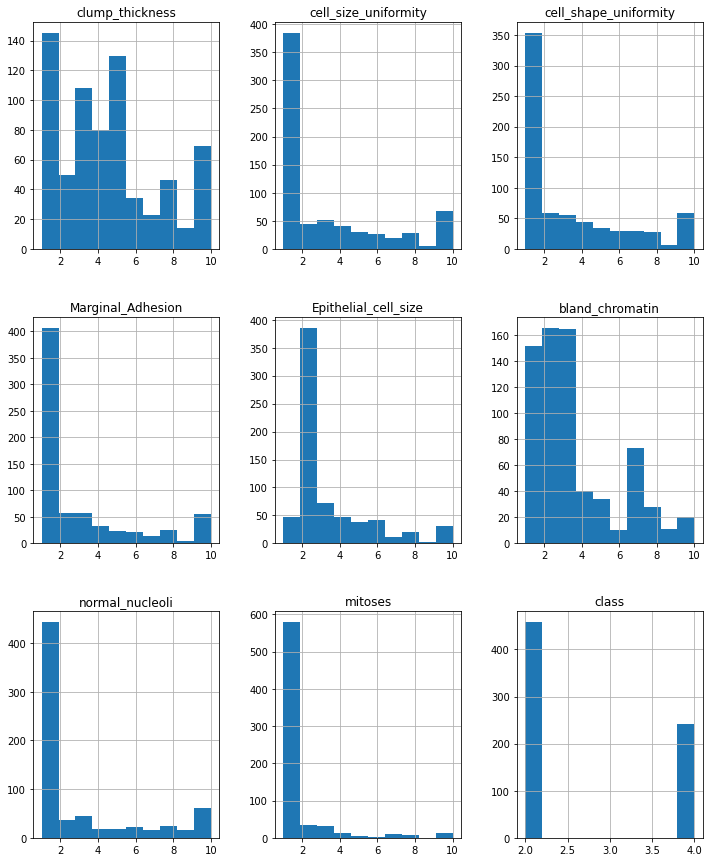

In [ ]:
df.hist(figsize = (12,15))
plt.show()

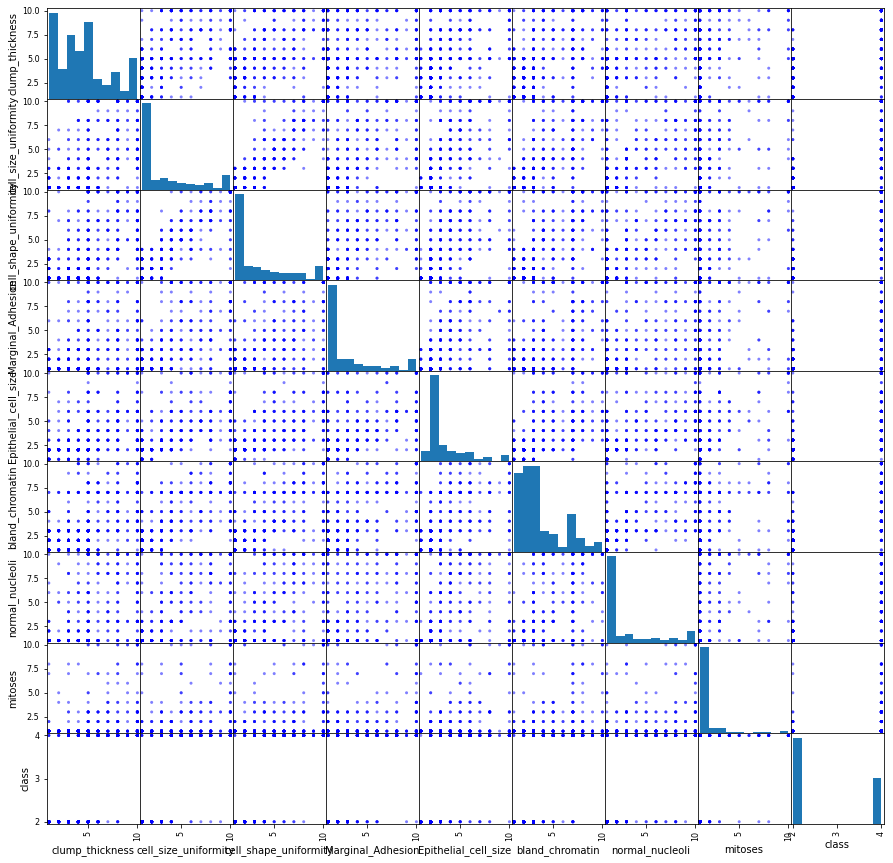

In [ ]:
scatter_matrix(df,figsize = (15,15),c = 'b',hist_kwds = {'color':['tab:blue']})
plt.show()

In [ ]:
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity',
       'Marginal_Adhesion', 'Epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [ ]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
seed = 7
scoring = 'accuracy'

In [ ]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC()))

for i in models:
    print(i)

('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'))
('SVM', SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))


In [ ]:
result = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits = 10,random_state = seed)
    
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv = kfold,scoring = scoring)
    result.append(cv_results)
    names.append(name)
    print('{} : {} ({})'.format(name,cv_results.mean(),cv_results.std()))
    print()
print(result)

KNN : 0.974935064935065 (0.008829497550030836)

SVM : 0.6493506493506493 (0.04475340503925397)

[array([0.98214286, 0.98214286, 0.96428571, 0.96428571, 0.98214286,
       0.96428571, 0.98214286, 0.98214286, 0.98214286, 0.96363636]), array([0.60714286, 0.64285714, 0.60714286, 0.58928571, 0.73214286,
       0.67857143, 0.625     , 0.66071429, 0.71428571, 0.63636364])]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
for name,model in models:
     
    model.fit(X_train,y_train)
    
    predictions = model.predict(X_test)
    print('{} : {}'.format(name,accuracy_score(y_test,predictions)))
    print()
    print(classification_report(y_test,predictions))

KNN : 0.9642857142857143

              precision    recall  f1-score   support

           2       0.98      0.97      0.97        95
           4       0.93      0.96      0.95        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

SVM : 0.6785714285714286

              precision    recall  f1-score   support

           2       0.68      1.00      0.81        95
           4       0.00      0.00      0.00        45

    accuracy                           0.68       140
   macro avg       0.34      0.50      0.40       140
weighted avg       0.46      0.68      0.55       140



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[109   3]
 [  3  60]]
0.9657142857142857


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[80  5]
 [ 1 54]]
0.9571428571428572
